In [1]:
import ejercicio2 as ej
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.animation import FuncAnimation
import mpld3
plt.style.use('default')
plt.rc('figure', figsize = (10,6))
plt.rc('font', size = 16)
from IPython.display import HTML, display
import re
from importlib.machinery import SourceFileLoader
ej = SourceFileLoader('ej', 'ejercicio2.py').load_module()

dt = 1
dx = 2

lam, T0, X = ej.init(dt, dx)
filesEX = ej.generic_resolv(lam, T0, tol=1e-2, method=ej.EXPLICITO)
filesCN = ej.generic_resolv(lam, T0, tol=1e-2, method=ej.CN)

In [42]:
def plotpanel(files, dt, lam, dx, **kwargs):
    fig = plt.figure( figsize=(15,10))
    ax = [fig.add_subplot(1,2,1)] #ax = [fig.add_axes([0.1,0.1,0.4,0.9])]
    #fig, ax = plt.subplots(1,3,))
    ej.plotlistT(files['tempfile'], dt, lam, dx=dx, ax=ax[0], fig=fig, savepdf=False, **kwargs)
    ax.append(fig.add_subplot(2,2,2))
    ej.plotlistF(files['flujofile'], lam, method='explicito', ax=ax[1], fig=fig, savepdf=False, maketitle=False)
    ax.append(fig.add_subplot(2,2,4))
    ej.plotlistE(files['errfile'], lam, method='explicito', ax=ax[2], fig=fig, savepdf=False, maketitle=False)
    t = [i*dt for i in ax[-1].get_xticks()]
    ax[-1].set_xticklabels(t)
    ax[-1].xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
    fig.tight_layout()
    return fig, ax

/tmp/ipykernel_23312/431085469.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[-1].set_xticklabels(t)


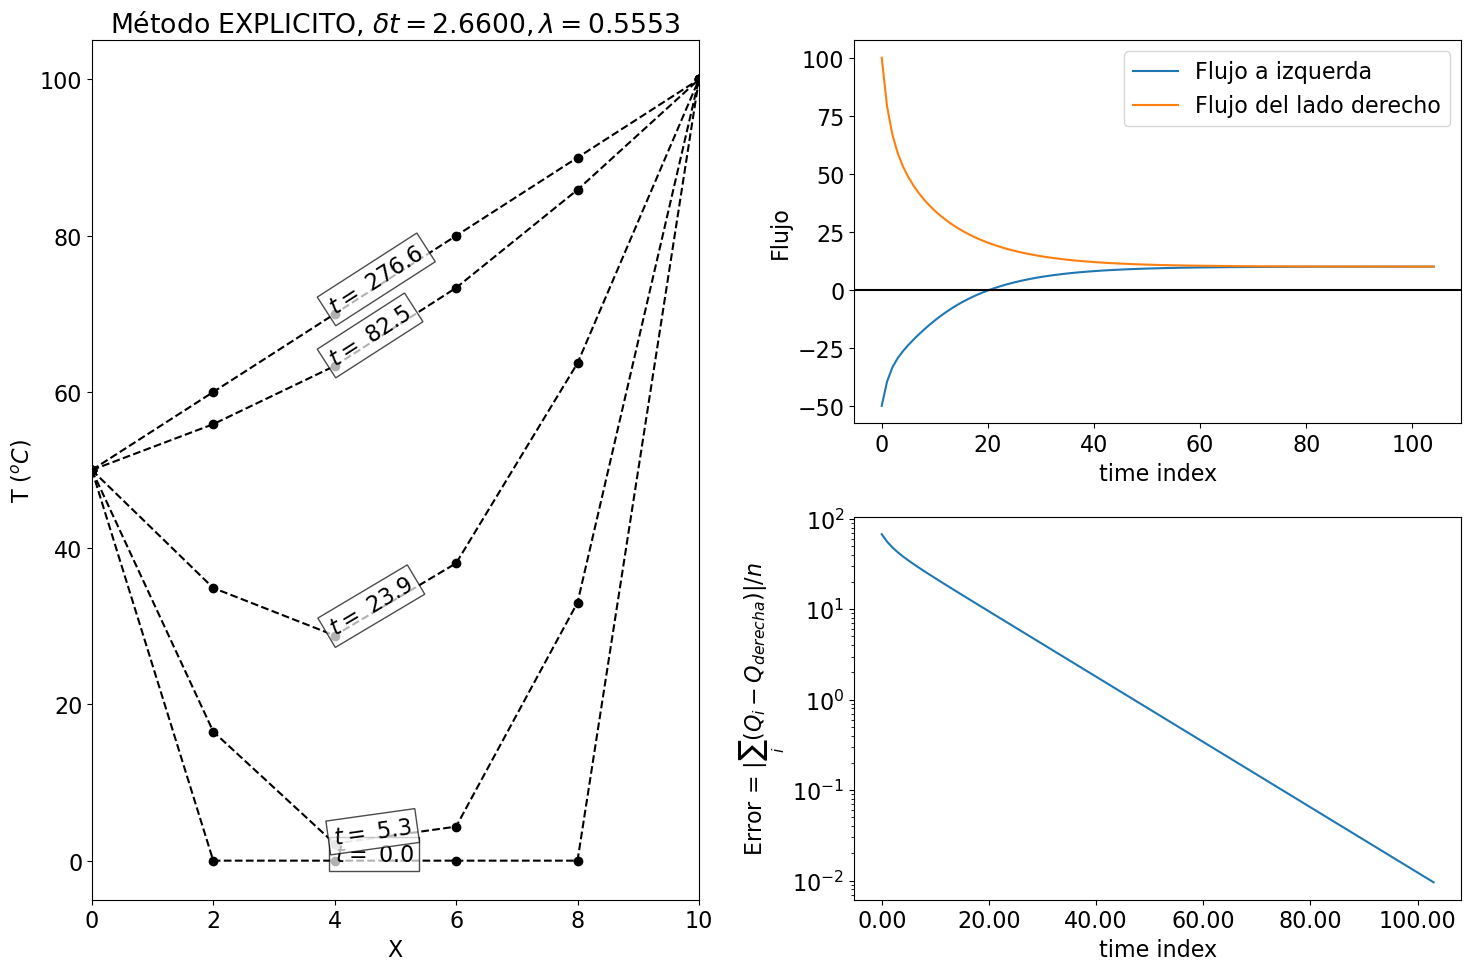

In [43]:
fig, ax = plotpanel( filesEX, dt, lam, dx)

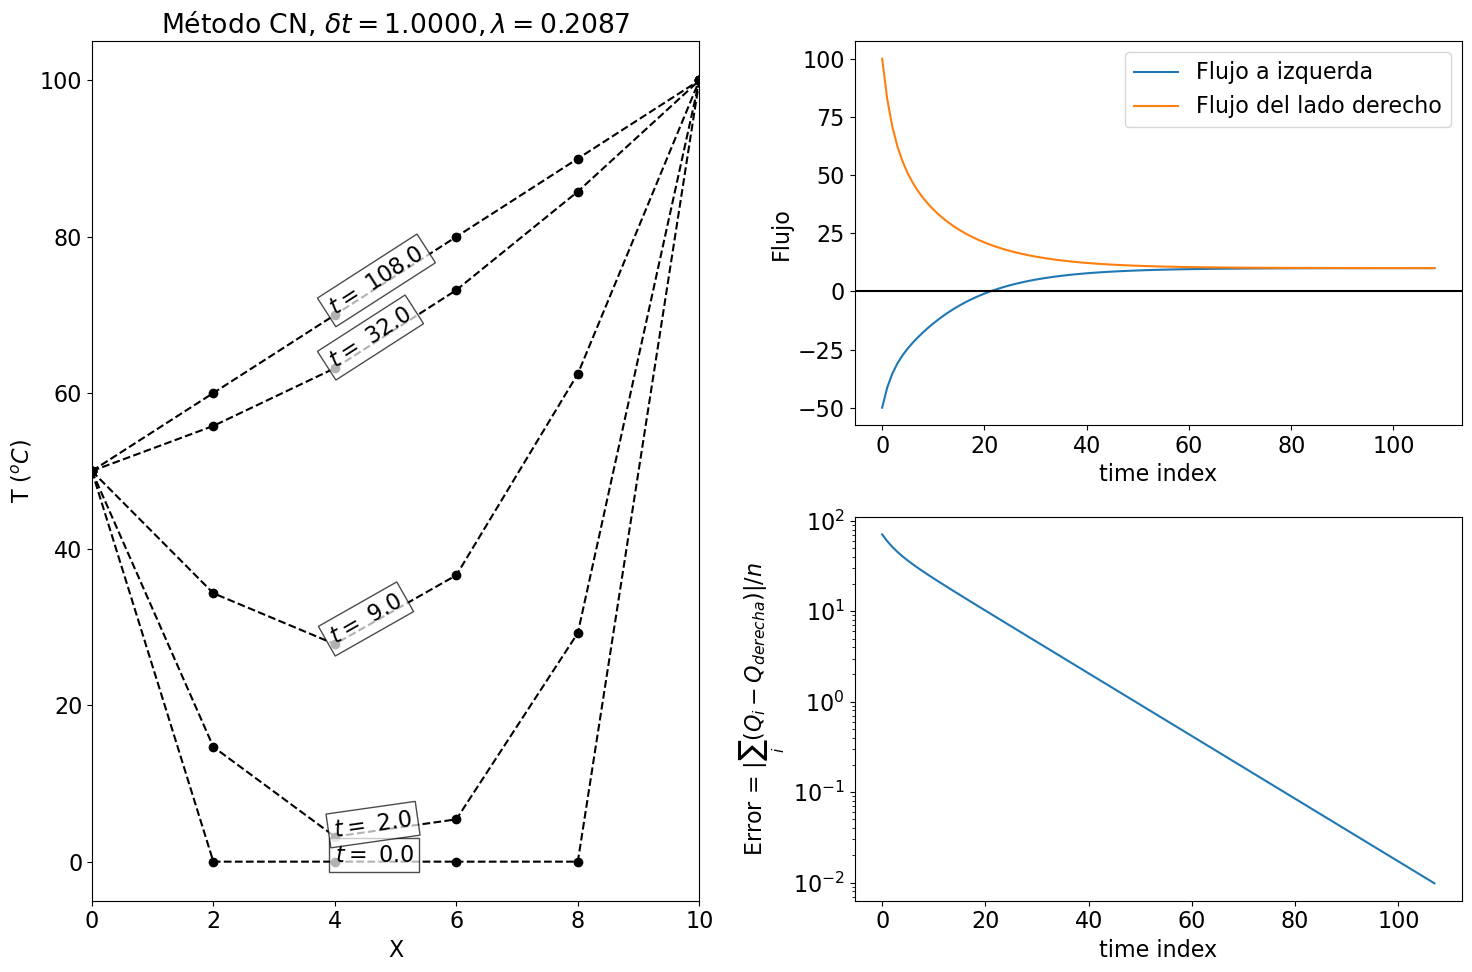

In [7]:
fig, ax = plotpanel( filesCN, dt, lam, dx)

In [11]:
import matplotlib
class BarAnimaton:
    
    def __init__(self,listfiles, lam, L=10, xlabel = 'x (cm)', ylabel = 'T (ºC)', dt=1, method = 'Excplicito'):
        self.T = np.loadtxt(listfiles['tempfile'])
        self.figT, self.axT = plotpanel(listfiles,dt, lam, dx)#, maketags=False)
        self.lamda = lam
        self.dt = dt
        self.x = np.linspace(0,L,  self.T.shape[1])
        self.method = method
    
    def cleanplot(self):
        [self.axT[0].lines.remove(line) for line in self.axT[0].lines[1:]]
#        texts = [child for child in self.axT[0].get_child() if isinstance(child, matplotlib.text.Text)]
        [t.set_visible(False) for t in self.axT[0].texts]
        self.lineT = self.axT[0].lines[0]
        
    def updateT(self, i):
        self.lineT.set_data(self.x,self.T[i])
        self.axT[0].set_title(fr'Método {self.method}, $\lambda = ${self.lamda:.4f}, t = {self.dt*i:3.2f} s, dt = {self.dt}')
        return self.lineT
    
    def do_animation(self, **kwargs):
        self.animationT = FuncAnimation(self.figT, self.updateT, init_func=self.cleanplot, frames = self.T.shape[0], **kwargs)# , blit=True, repeat=True)

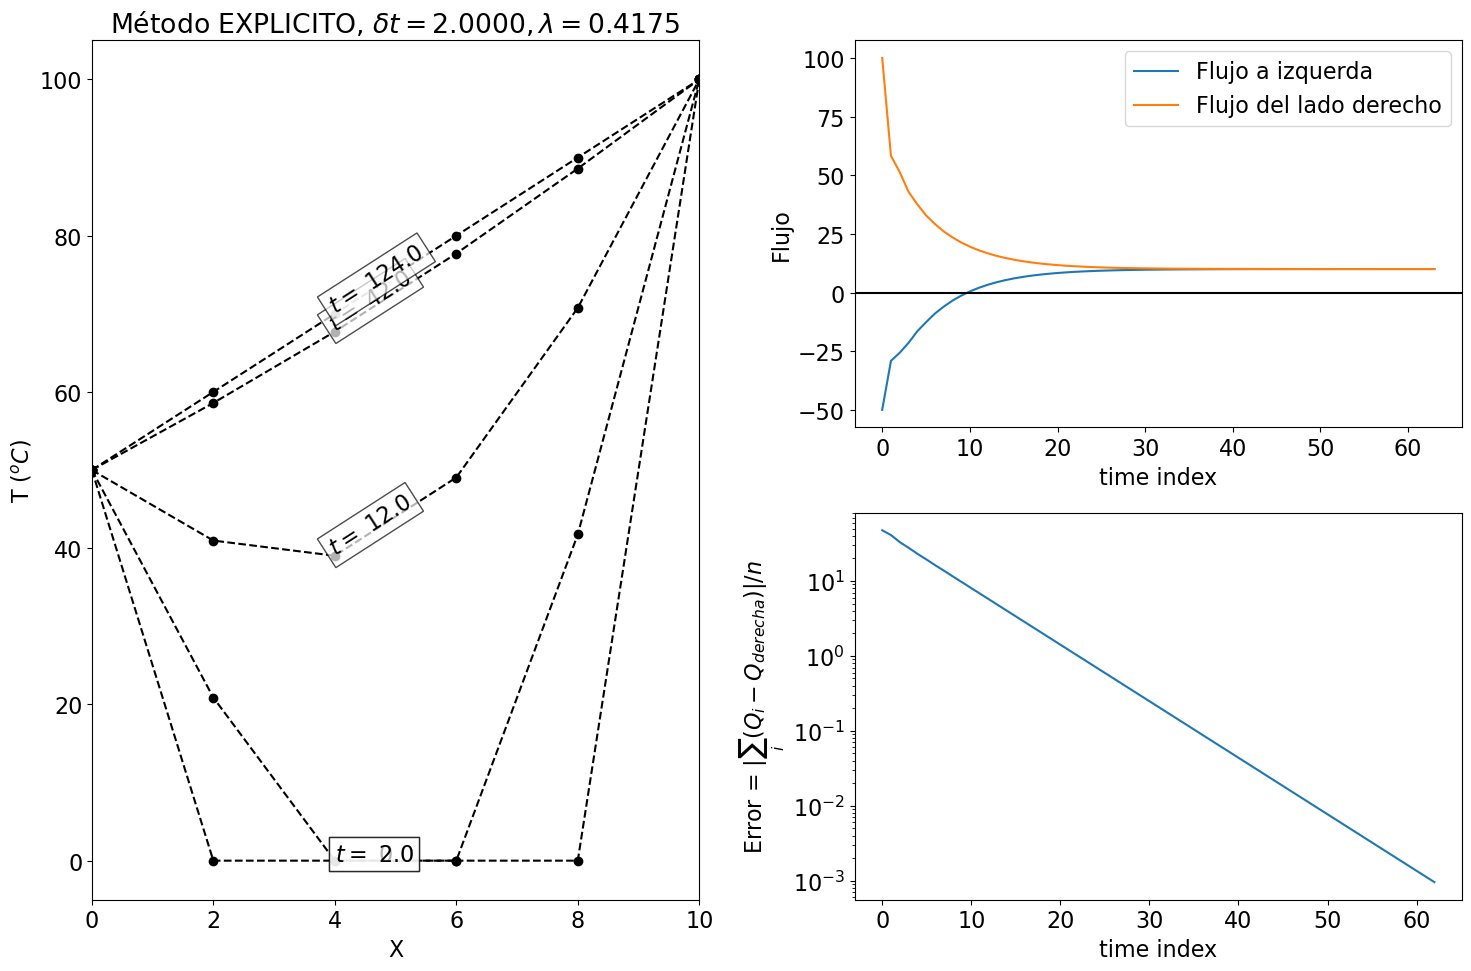

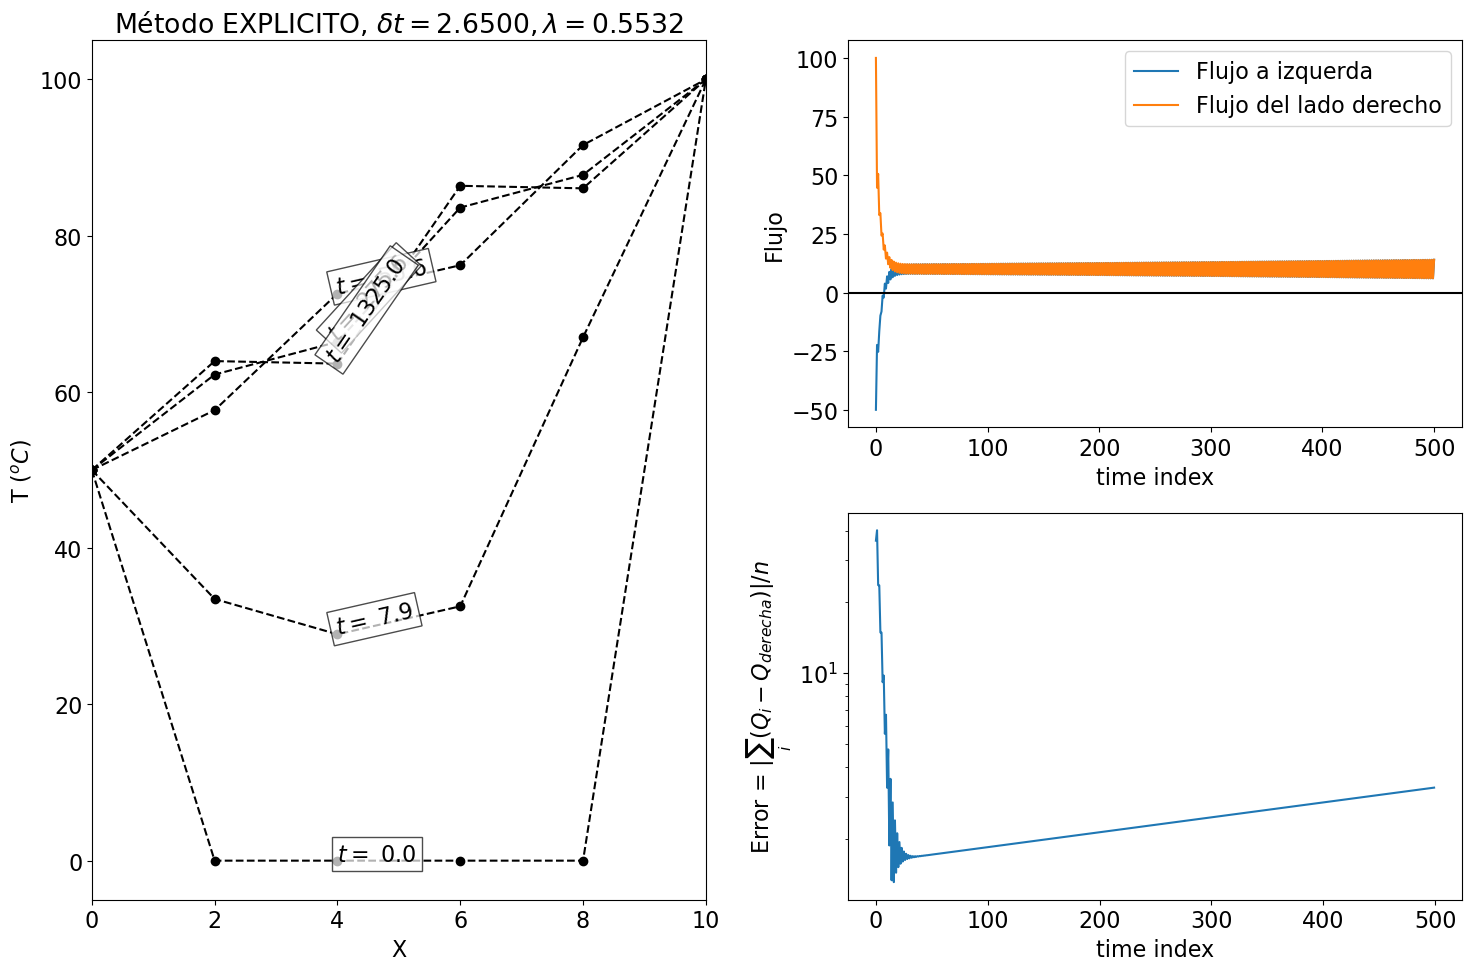

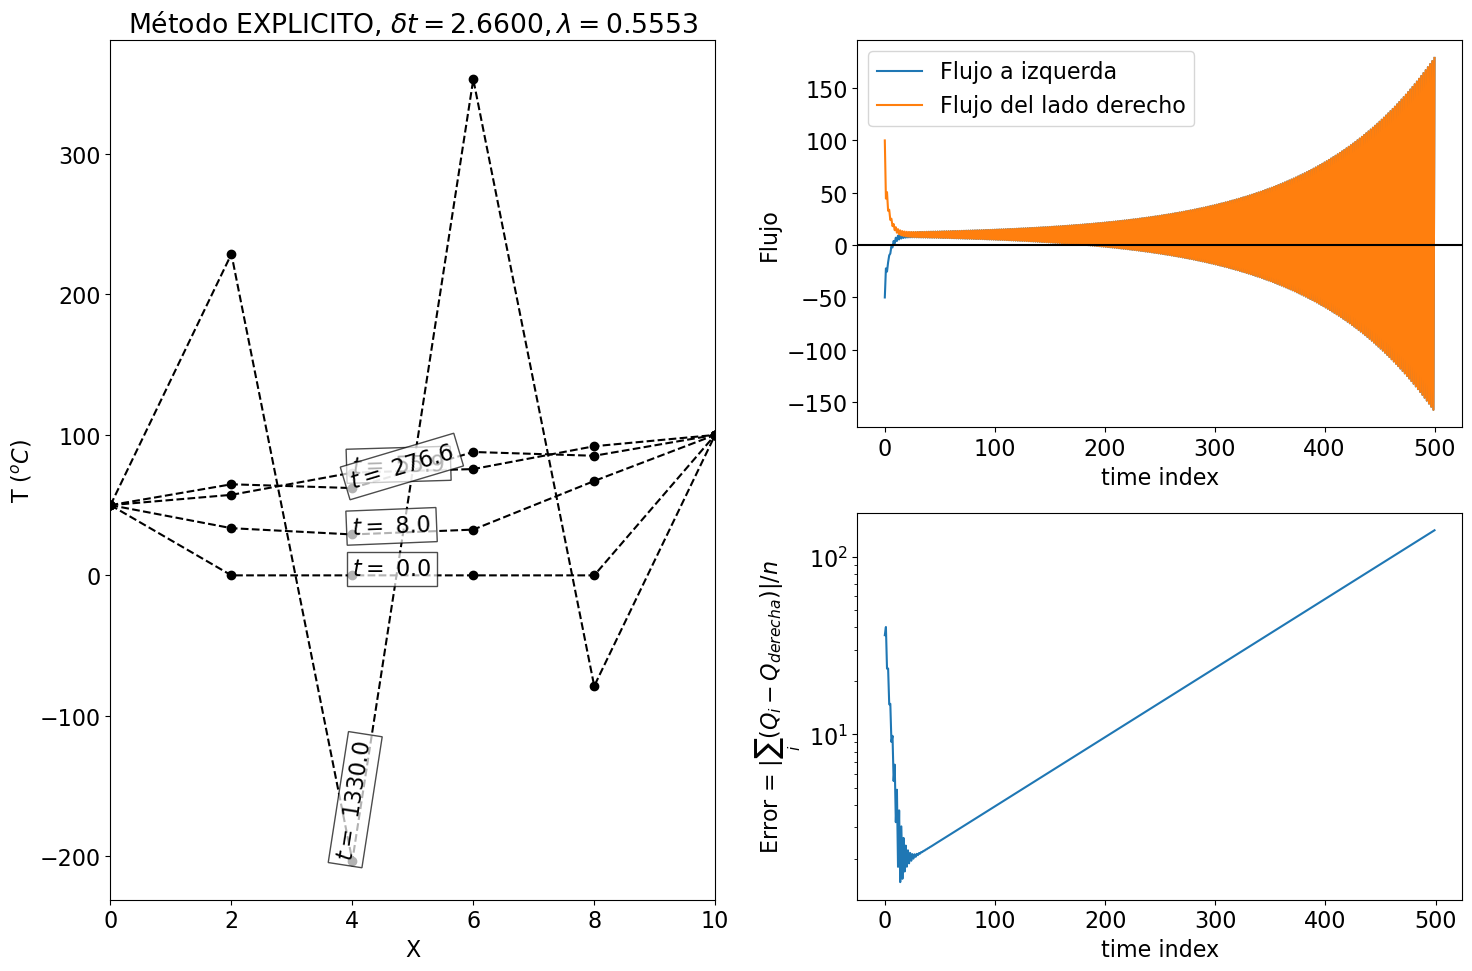

In [12]:
dts = [2, 2.65, 2.66]
dx = 2
animations = []
implicitos = []
lambdas = []
files = {}
for dt in dts:
    lam, T0, X = ej.init(dt, dx)
    lambdas.append(lam)
    files[lam] = {'explicito': ej.generic_resolv(lam, T0, method=ej.EXPLICITO)}
    files[lam].update({'cranck-nicholson': ej.generic_resolv(lam, T0, method=ej.CN)})
    animations.append(BarAnimaton(files[lam]['explicito'], lam, dt=dt))
    animations[-1].do_animation()

In [9]:
html=''
for (lam, thefiles), animation in zip(files.items(), animations):
    html+=animation.animationT.to_html5_video()
display(HTML(html))
    